### Sklearn Polynomial Regression Model

In [4]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [5]:

df = pd.read_csv(r"C:\Users\divyakamat\python_git_repositories\linear_regression\Milage Prediction\dataset\Car-mpg-processed.csv")

In [6]:
def intial_analysis(dataframe):
    
    # Enclosing the string within '\033[1m' and '\033[0m', displays the text in bold
    print ('\033[1m' + "Display first few rows of the data frame:"+'\033[0m')
    print(dataframe.head(3))
    
    print('\033[1m' + "\nDisplay the shape (columns and rows) of the dataset:" +'\033[0m' )
    print("\tcolumns : {}\n\trows : {}".format(dataframe.shape[0],dataframe.shape[1]))
    
    print('\033[1m' + "\nInformation about the dataset:" +'\033[0m')
    dataframe.info()
    
    print('\033[1m' + "\nDetails on Numerical and Categorical features within dataset:\n" + '\033[0m')
    #list the number of Numerical Features in our dataset.
    numerical_feature_columns = list(df._get_numeric_data().columns)
    print("Numeric Columns:",numerical_feature_columns)
    
    #let's find out the number of Categorical Features in our dataset.
    categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
    print("Categorical Columns:",categorical_feature_columns)
    
    print('\033[1m' + "\nPrint any null values within dataset:\n" + '\033[0m')
    labels = []
    values = []
    for col in dataframe.columns:
        labels.append(col)
        values.append(dataframe[col].isnull().sum())
        if values[-1]!=0:
            print(col, values[-1])

intial_analysis(df)  

Display first few rows of the data frame:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   

   model_year  car_type  origin_america  origin_asia  origin_europe  
0          70         0               1            0              0  
1          70         0               1            0              0  
2          70         0               1            0              0  

Display the shape (columns and rows) of the dataset:
	columns : 398
	rows : 11

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
mpg               398 non-null float64
cylinders         398 non-null int64
displacement      398 non-null float64
horsepower        398 non-null float64
weight            398 non-

### Model Creation

In [7]:
df_train = df.copy()
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = df_train.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df_train[['mpg']]


In [8]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


Since on many dimensions, the relationship is not really linear, let us try polynomial models (quadratic)

In [9]:

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)

#print(y_pred)

print(poly_clf.score(X_test_, y_test))

0.8626121616844512


In [10]:
print(X.shape)
print(X_train_.shape)
poly

(398, 10)
(278, 56)


PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)

In [11]:
# Let us explore the coefficients for each of the polynomial attributes

reg_label = "Inliers coef:%s - b:%0.2f" % \
            (np.array2string(poly_clf.coef_,
                             formatter={'float_kind': lambda fk: "%.3f" % fk}),
            poly_clf.intercept_)
print(reg_label)


Inliers coef:[[-114820099.813 12.740 -0.508 0.847 -0.013 -5.257 0.687 -30.115 27.397
  -45.445 18.049 -0.006 -0.021 0.001 0.587 -0.347 9.394 4.950 11.355
  -3.565 0.000 -0.000 -0.001 0.008 -0.016 -0.081 -0.271 -0.155 -0.000
  -0.005 -0.013 -0.026 0.241 0.316 0.289 -0.000 0.000 -0.009 -0.009
  -0.001 -0.003 0.053 1.272 -1.969 -2.241 -1.047 0.158 -0.086 0.442 0.331
  -8.957 -0.220 -20.939 0.000 0.000 0.000]] - b:114820105.44


Reference[https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/]
https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

In [33]:
import statsmodels.formula.api as sm
from statsmodels.api import add_constant

Xtrain_ols = X_train.copy()
Xtrain_ols['cylinders'] =Xtrain_ols['cylinders'].astype('int64')  # converting the hp column from object / string type to float
Xtrain_ols['model_year'] = Xtrain_ols['model_year'].astype('int64')  

Xtrain_ols = add_constant(Xtrain_ols)
results = sm.OLS(y_train,Xtrain_ols).fit()
results.summary()

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           3.12e-99
Time:                        05:59:01   Log-Likelihood:                -718.16
No. Observations:                 278   AIC:                             1456.
Df Residuals:                     268   BIC:                             1493.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -21.1765      4.143     -5.112      0.000     -29.333     -13.020
cylinders          1.4751      0.517      2.856      0.005       0.458       2.492
displacement       0.0243      0.010      2.544      0.012       0.006       0.043
horsepower        -0.0469      0.016     -2.915      0.004      -0.079      -0.015
weight            -0.0066      0.001     -8.118      0.000      -0.008      -0.005
acceleration       0.0417      0.112      0.373      0.709      -0.178       0.262
model_year         0.7939      0.061     13.088      0.000       0.674       0.913
car_type           5.9666      1.042      5.728      0.000       3.916       8.018
origin_america    -8.4832      1.461     -5.808      0.000     -11.359      -5.608
origin_asia       -6.4067      1.452     -4.412      0.000      -9.266      -3.548
origin_europe     -6.2866      1.387     -4.532      0.000      -9.017      -3.556
==============================================================================
Omnibus:                       22.678   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.139
Skew:                           0.513   Prob(JB):                     1.42e-08
Kurtosis:                       4.438   Cond. No.                     3.44e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
import statsmodels.formula.api as sm
from statsmodels.api import add_constant

Xtrain_ols_2 = X_train.copy()
Xtrain_ols_2['cylinders'] =Xtrain_ols_2['cylinders'].astype('int64')  # converting the hp column from object / string type to float
Xtrain_ols_2['model_year'] = Xtrain_ols_2['model_year'].astype('int64')  
Xtrain_ols_2.drop('acceleration',axis = 1, inplace = True)

Xtrain_ols_2 = add_constant(Xtrain_ols_2)
model_fit = sm.OLS(y_train,Xtrain_ols_2).fit()
model_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 17 Apr 2019   Prob (F-statistic):          2.48e-100
Time:                        05:59:02   Log-Likelihood:                -718.23
No. Observations:                 278   AIC:                             1454.
Df Residuals:                     269   BIC:                             1487.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -20.5797      3.815     -5.394      0.000     -28.091     -13.068
cylinders          1.4865      0.515      2.887      0.004       0.473       2.500
displacement       0.0236      0.009      2.527      0.012       0.005       0.042
horsepower        -0.0504      0.013     -3.862      0.000      -0.076      -0.025
weight            -0.0064      0.001     -9.040      0.000      -0.008      -0.005
model_year         0.7922      0.060     13.118      0.000       0.673       0.911
car_type           5.9789      1.040      5.752      0.000       3.932       8.025
origin_america    -8.2740      1.346     -6.145      0.000     -10.925      -5.623
origin_asia       -6.2169      1.358     -4.578      0.000      -8.890      -3.543
origin_europe     -6.0889      1.280     -4.758      0.000      -8.608      -3.569
==============================================================================
Omnibus:                       24.066   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.001
Skew:                           0.534   Prob(JB):                     3.40e-09
Kurtosis:                       4.492   Cond. No.                     3.84e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

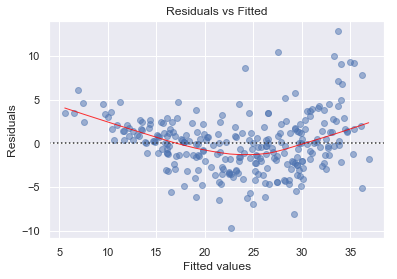

In [77]:
sns.set(color_codes=True)
dataframe = pd.concat([Xtrain_ols, y_train], axis=1)

#model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

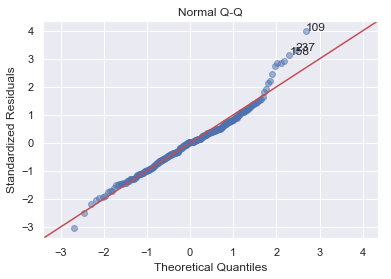

In [78]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

<Figure size 432x288 with 0 Axes>

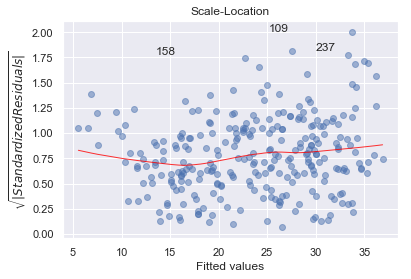

In [79]:
plot_lm_3 = plt.figure()
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));

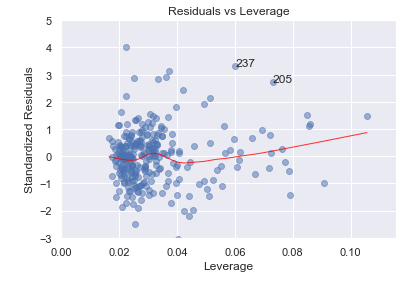

In [81]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));